Grupo = Pilares da Criação

**Pergunta a ser respondida:** Investir em sustentabilidade gera maior valorização das ações das empresas?

**Análises:**
- Pegamos a listagem das empresas participantes do ISE 2021, junto com o Score e o valor das dimensões utilizadas para calcular (Capital Humano, Governança Corporativa, Modelos de Negócios e Inovação, Capital Social, Meio Ambiente e CDP).
- Baixamos a série histórica dessas empresas e pegamos o valor de fechamento ajustado (Adj Close). Com esse valor, fizemos um cálculo de variação dessa ação para comparar se tem influência entre os valores das dimensões do ISE e da variação das ações
- Baixamos os valores do índice ISE e IBOV, normalizamos e comparamos a evolução dos 2 índices

**Conclusão:** Não encontramos correlação entre a variação das ações e o investimento no ISE e nem maior valorização do índice ISE quando comparado com o índice IBOV. Mas como ação é apenas especulação, optamos por adicionar outra pergunta:

**Pergunta 2**: E ao analisar dados fundamentalistas, existe melhora nos resultados das empresas que investem no ISE?

**Análises:**
- Baixamos os dados de Lucro por Ação, Retorno sobre Investimento, Retorno sobre ativo, Margem de Lucro Líquido e Margem de Lucro Operacional das empresas que compõem o ISE.
- Fizemos uma regressão para comparar o Lucro por ação com o Score do ISE e vimos que não tem relação (praticamente reta)
- Fizemos outra regressão para comparar o Lucro líquido com o Score do ISE e também vimos que não tem relação (praticamente reta)
- Resolvemos analisar empresas do mesmo setor para comparar os resultados daquelas que participam do ISE e que não participam. Escolhemos o setor de energia.
- Buscamos todas as empresas listadas na B3 de energia e separamos quais participam do ISE. (tivemos diferença entre a quantidade dessas empresas - 40 que não participam do ISE e 13 que participam). Por conta disso, baixamos o valor do lucro bruto das empresas para comparar e pegar uma amostra de 13 empresas que não participam do ISE que seja semelhante ao das empresas que participam.
- Criamos um boxplot para comparar o LPA entre as empresas que participam do ISE e não participam do ISE. Nossa conclusão é que a mediana das empresas que investem no ISE tem menor variação do LPA e a mediana está maior 

In [8]:
import seaborn as sns
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
import pandas as pd
import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
#Lendo os dados ISE baixados da B3.
scores = pd.read_excel('/content/indices.xlsx', sheet_name = 'Scores 2021')

In [11]:
#Adicionando .SA ao final do código, para poder utilizar na série temporal

scores['Ticker'] = (scores['Código'] + '.SA').astype(str)

In [13]:
#Fazendo lista com os tickers das ações ISE 2022.
tickers_ise = scores['Ticker'].tolist()

In [14]:
#Baixando preço de fechamento de balcão das empresas que compõem o ISE 2022. 
papeis_ise = yf.download(tickers=tickers_ise, start='2022-1-1')['Adj Close']

[*********************100%***********************]  48 of 48 completed


In [15]:
#Ajudando o index do DF para o formato aaaa-mm-dd.
papeis_ise.dropna(inplace=True)
papeis_ise = papeis_ise.reset_index()
papeis_ise['Date'] = pd.to_datetime(papeis_ise['Date']).dt.date
papeis_ise['Date'] = pd.to_datetime(papeis_ise['Date'])
papeis_ise = papeis_ise.set_index('Date')

In [16]:
#Calculando a variação das ações no ano de 2022.
Variação = (papeis_ise.iloc[-1]/papeis_ise.iloc[0])-1
Variação = Variação.to_list()
scores['Variação'] = Variação

In [ ]:
#Deixei o 'df' abaixo com opção baixar o arquivo "xlsx" na planilha indices para poupar tempo de processamento. (não executar célula 11 e 32)

In [ ]:
#Colentando dados fundamentalistas das empresas que compõem o ISE 2022. 
company_metrics = {}
for company in tickers_ise:
    company_metrics[company] = {}

    company_info = yf.Ticker(company)
    company_metrics[company]['Lucro por ação'] = company_info.info['trailingEps']
    company_metrics[company]['Retorno / Investimento'] = company_info.info['returnOnAssets']
    company_metrics[company]['Retorno / Ativos'] = company_info.info['returnOnEquity']
    company_metrics[company]['Margem de Lucro Líquido'] = company_info.info['profitMargins']
    company_metrics[company]['Margem de Lucro Operacional'] = company_info.info['operatingMargins']
df = pd.DataFrame.from_dict(company_metrics)

In [ ]:
df = df.T

In [ ]:
df.to_excel('Dados Fundamentalistas ISE 2022.xlsx')

In [17]:
df = pd.read_excel('/content/indices.xlsx', sheet_name='Dados Fundamentalistas ISE 2022')

In [18]:
scoresvarfund = pd.concat([scores.reset_index(drop=True), df.reset_index(drop=True)],axis=1) 

In [19]:
corr_scores = pd.concat([scores.reset_index(drop=True), df.reset_index(drop=True)],axis=1) 

In [20]:
corr_scores = corr_scores.drop(columns=['RANKING', 'SCORE ISE B3','Unnamed: 0','Lucro por ação', 'Retorno / Investimento',
                                        'Retorno / Ativos', 'Margem de Lucro Líquido','Margem de Lucro Operacional'])

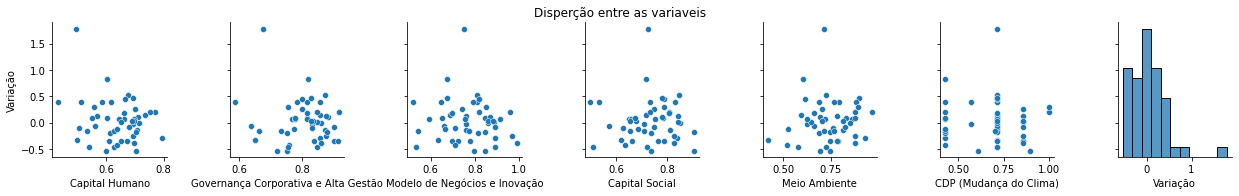

In [21]:
#Plotando gráficos de dispersão das dimensões ISE 2022 frente a variação das empresas listadas no índice.
ax = sns.pairplot(data=corr_scores, y_vars='Variação')
ax.fig.suptitle('Disperção entre as variaveis', y=1.05);

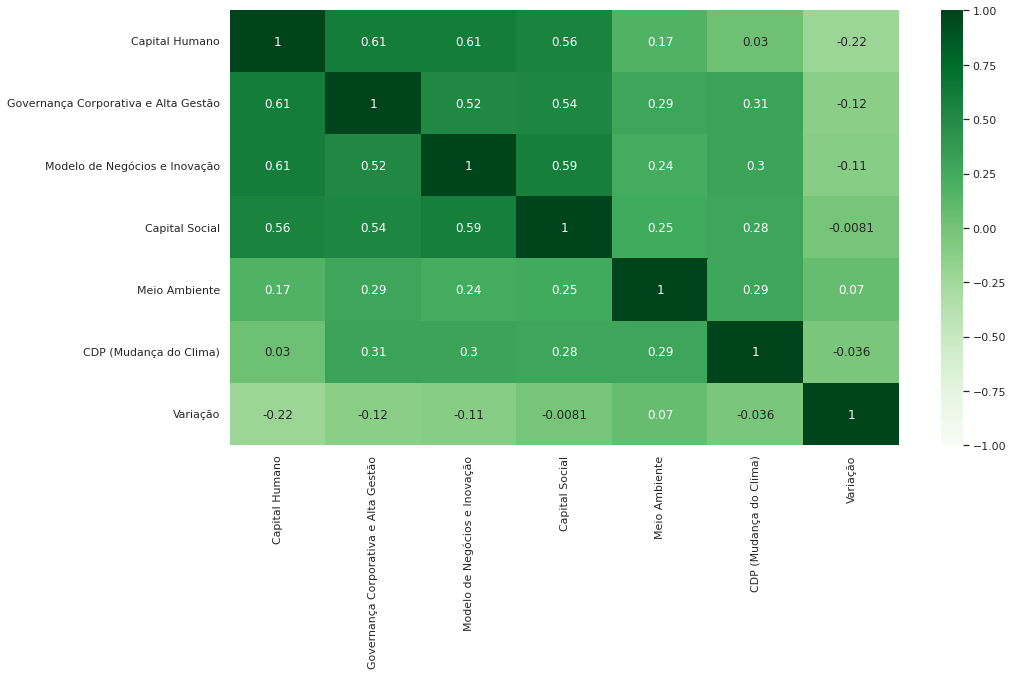

In [22]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr_scores.corr(),vmin=-1, vmax=1, cmap="Greens", annot=True);

In [23]:
#Fazendo upload da série histórica do ISE desde 2006. Este índice não contém no YF portanto sendo necessário baixá-los manualmente no site de índices da B3.
isee = pd.read_excel('/content/indices.xlsx', sheet_name='Evolucaoisee')

In [24]:
#Dropando dias que não possuem cotação (Fins de semana, feriados)
isee.dropna(inplace=True)

In [25]:
#Padronizando o índice "Date"
isee['Date'] = pd.to_datetime(isee['Date'])
isee = isee.set_index('Date')

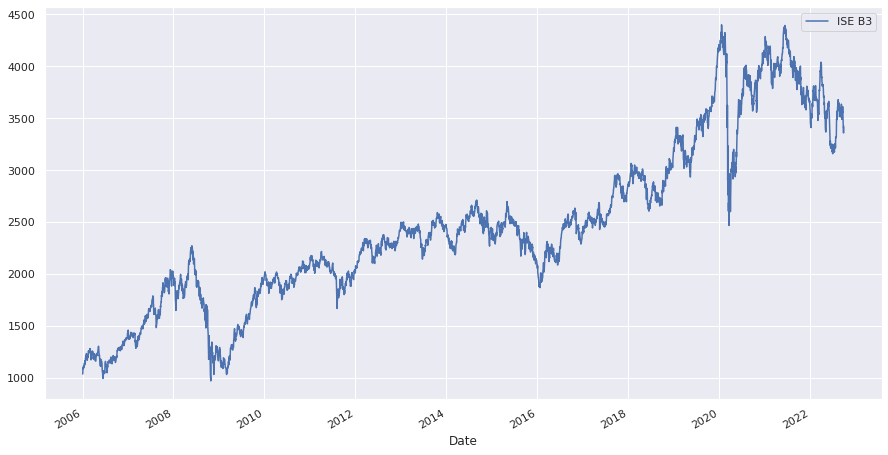

In [26]:
#Variação do ISE ao longo do ano.
isee.plot();

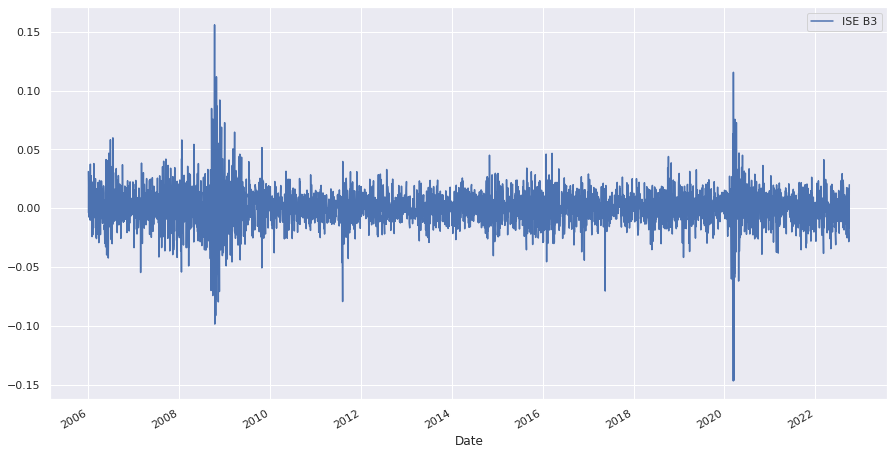

In [30]:
#Calculando e plotando a variação diária do ISE.
isee_retornos = isee.pct_change()
isee_retornos.plot()

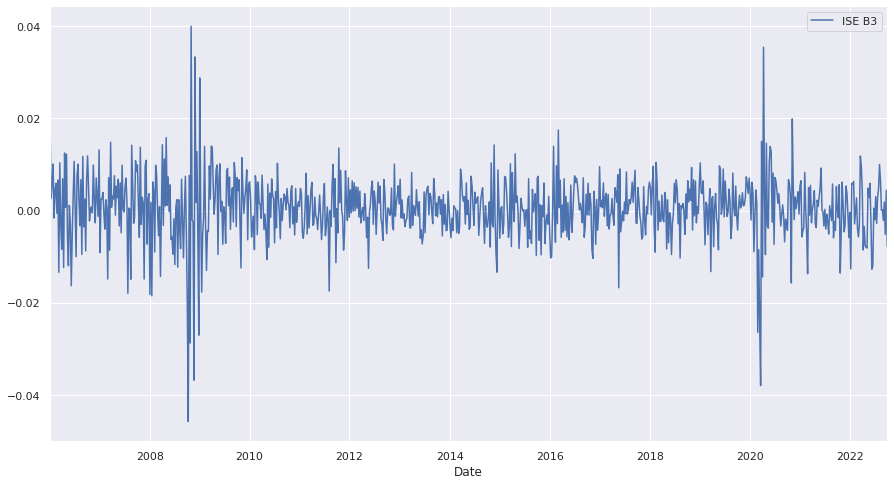

In [28]:
#Fazendo média semanal das variações. Outros períodos de tempo "Y = anual", "M = mensal".
isee_media_semanal = isee_retornos.resample('W').mean()
isee_media_semanal.plot();

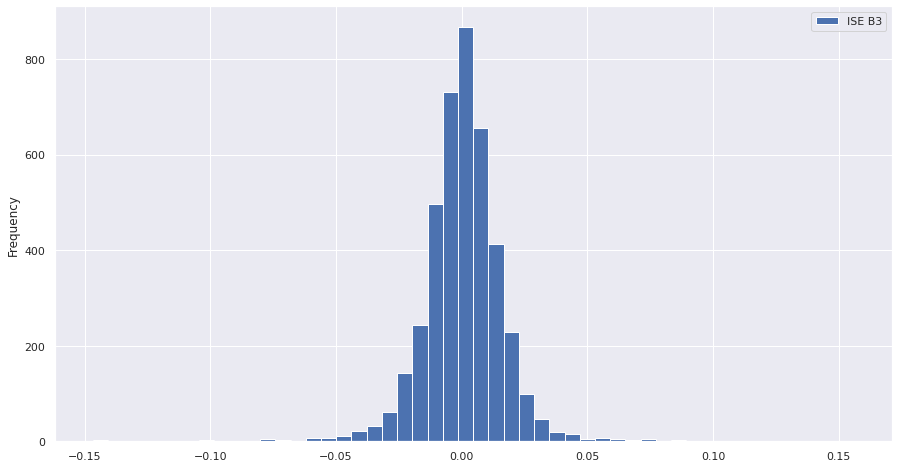

In [29]:
#Fazendo histograma das variações observadas ao longo dos anos.
isee_retornos.plot.hist(bins=50);

In [31]:
#Dados estatísticos das variações do ISE ao longo dos ano.
isee_retornos.describe()

,ISE B3
count,4142.000000
mean,0.000415
std,0.015955
min,-0.146743
25%,-0.007505
50%,0.000540
75%,0.008699
max,0.155970


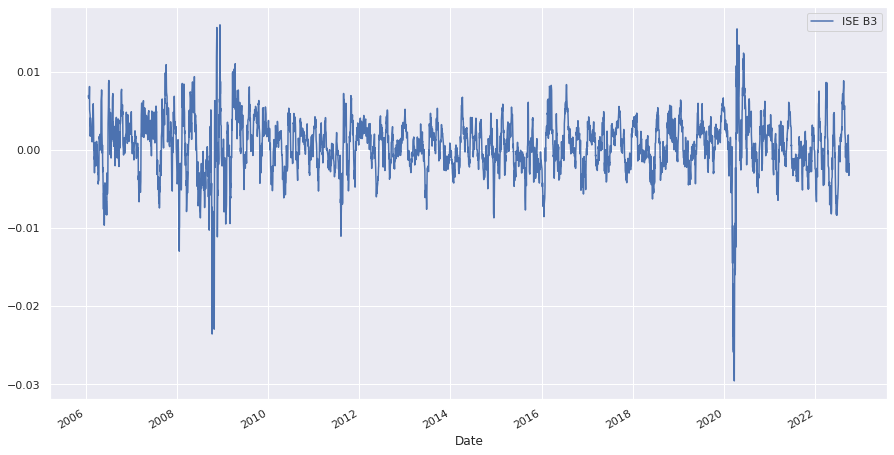

In [32]:
#Média móvel (15 dias) das variações do ISE ao longo dos anos.
media_movel_retornos_isee = isee_retornos.rolling(window=15).mean()
media_movel_retornos_isee.plot();

In [33]:
#Volatilidade
isee_retornos.std()

ISE B3    0.015955
dtype: float64

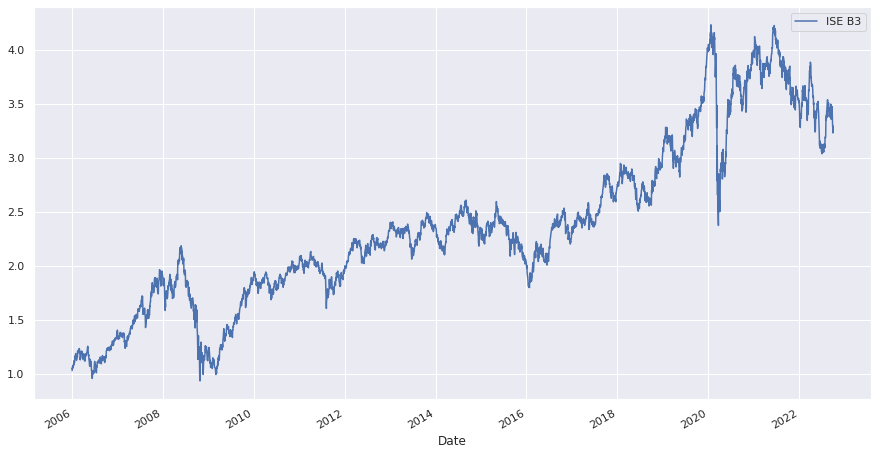

In [34]:
#Fazendo a normalização da ação
retorno_acm_isee = (1+isee_retornos).cumprod()
retorno_acm_isee.plot();

In [35]:
#Coletando a série histórica e fazendo a mesma modelagem para o índice Bovespa.
ibov = yf.download('^BVSP', start='2006-1-1')['Adj Close']
ibov = ibov.reset_index()
ibov['Date'] = pd.to_datetime(ibov['Date']).dt.date
ibov['Date'] = pd.to_datetime(ibov['Date'])
ibov = ibov.set_index('Date')
ibov = ibov.rename({'Adj Close':'IBOV'}, axis=1)
ibov_retornos = ibov.pct_change()
retorno_acm_ibov = (1+ibov_retornos).cumprod()

[*********************100%***********************]  1 of 1 completed


In [36]:
#Comparando os retornos oferecidos pelos índices ISE e BOVESPA desde 2006.
df_geral = pd.merge(retorno_acm_ibov, retorno_acm_isee, how='inner', on='Date')

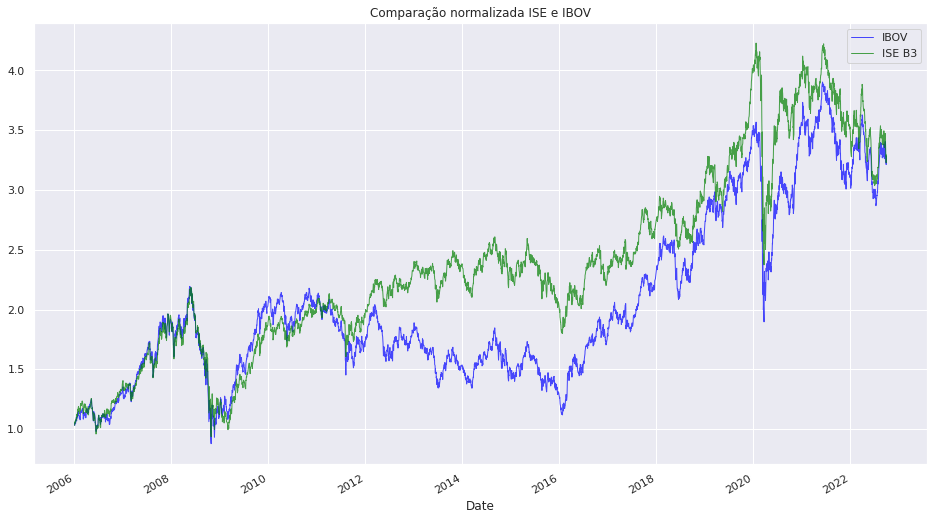

In [37]:
color=['blue','green']
df_geral[['IBOV', 'ISE B3']].plot(title = 'Comparação normalizada ISE e IBOV', lw = '1', color=color, alpha=0.7, figsize=(16,9));

In [40]:
#Lendo as empresas de Energia
energia = pd.read_csv('/content/Setorial B3 14-10-2022 (português).xlsx - Página1.csv')

In [41]:
#Fazendo lista com os tickers das ações 
ticker_energia = energia['Ticker'].tolist()

In [42]:
#Baixando preço de fechamento de balcão das empresas que compõem o segmento de energia. 
papeis_energia = yf.download(tickers=ticker_energia, start='2022-1-1')['Adj Close']

[*********************100%***********************]  63 of 63 completed


In [43]:
papeis_energia['Date']= papeis_energia.index.date

new_papeis_energia= papeis_energia.melt(id_vars=['Date'], var_name=['Empresa'], value_name='Adj Close')
new_papeis_energia = new_papeis_energia.dropna()
new_papeis_energia = new_papeis_energia.reset_index()
new_papeis_energia = new_papeis_energia.drop(['index'], axis = 1)

In [44]:
dados = new_papeis_energia.merge(energia, right_on = "Ticker", left_on = "Empresa", how='inner')
dados = dados.drop(['Empresa_y'], axis = 1)
dados = dados.rename(columns={'Empresa_x': 'Empresa'})

In [45]:
#Calculando a variação do valor das ações

variacao = (dados['Adj Close'].pct_change())*100

#Adicionando os valores de variação em uma coluna no final do dataFrame

dados.loc[:, 'Variação'] = variacao
dados = dados.dropna()

In [ ]:
#Colentando dados fundamentalistas das empresas do setor de energia.

# LPA - Lucro por Ação
# ROI - Retorno sobre Investimento
# ROA - Rertorno sobre Ativo
# MLL - Margem de Lucro Líquido
# MLO - Marge de Lucro Operacional
# LB - Lucro Bruto

company_metrics = {}
for company in ticker_energia:
    company_metrics[company] = {}

    company_info = yf.Ticker(company)
    company_metrics[company]['LPA'] = company_info.info['trailingEps']
    company_metrics[company]['ROI'] = company_info.info['returnOnAssets']
    company_metrics[company]['ROA'] = company_info.info['returnOnEquity']
    company_metrics[company]['MLL'] = company_info.info['profitMargins']
    company_metrics[company]['MLO'] = company_info.info['operatingMargins']
    company_metrics[company]['LB'] = company_info.info['grossProfits']
df = pd.DataFrame.from_dict(company_metrics)

In [ ]:
df_lb = df_lb.T

df_lb = df_lb.reset_index()
df_lb = df_lb.rename({'index':'Ticker'}, axis=1)

In [ ]:
dados_agrupado = dados.groupby(['Empresa'])['Variação'].mean()
dados_agrupado = dados_agrupado.to_frame()

In [ ]:
#Plotando gráficos de dispersão das dimensões ISE 2022 frente a variação das empresas listadas no índice.
ax = sns.pairplot(data=final, y_vars='Variação')
ax.fig.suptitle('Disperção entre as variaveis', y=1.05);